<a href="https://colab.research.google.com/github/taimoorsardar/Machine-Learning-Projects/blob/main/KnnClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
 # change these paths accrodingly
training_dataset = pd.read_excel('/content/drive/MyDrive/Semester 6/ML/Lab 6/TrainingSet.xlsx')
testing_dataset = pd.read_excel('/content/drive/MyDrive/Semester 6/ML/Lab 6/TestingSet.xlsx')

In [ ]:
training_dataset.head()

,leaf.length,leaf.width,flower.length,flower.width,plant
0,5.4,3.7,1.5,0.2,Arctica
1,4.8,3.4,1.6,0.2,Arctica
2,4.8,3.0,1.4,0.1,Arctica
3,4.3,3.0,1.1,0.1,Arctica
4,5.8,4.0,1.2,0.2,Arctica


In [ ]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   leaf.length    120 non-null    float64
 1   leaf.width     120 non-null    float64
 2   flower.length  120 non-null    float64
 3   flower.width   120 non-null    float64
 4   plant          120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [ ]:
X_train =  training_dataset.drop(columns = ['plant'])
y_train =  training_dataset['plant']

print (y_train.unique())

['Arctica' 'Harlequin' 'Carolinian']


In [ ]:
y_train = y_train.map({'Arctica':0,'Harlequin':1,'Carolinian':2})

In [ ]:
X_train.describe()

,leaf.length,leaf.width,flower.length,flower.width
count,120.000000,120.000000,120.000000,120.000000
mean,5.843333,3.061667,3.731667,1.195833
std,0.795020,0.451549,1.742353,0.758747
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
means = X_train.mean(axis = 0)
stds = X_train.std(axis = 0)

In [ ]:
X_train_scaled = (X_train - means) / stds
# Print normalized features
print(X_train_scaled)

     leaf.length  leaf.width  flower.length  flower.width
0      -0.557638    1.413653      -1.280835     -1.312471
1      -1.312337    0.749273      -1.223441     -1.312471
2      -1.312337   -0.136567      -1.338228     -1.444267
3      -1.941252   -0.136567      -1.510409     -1.444267
4      -0.054506    2.078033      -1.453016     -1.312471
..           ...         ...            ...           ...
115     1.077542   -0.136567       0.842730      1.455250
116     0.574409   -1.243867       0.727943      0.928065
117     0.825976   -0.136567       0.842730      1.059862
118     0.448626    0.749273       0.957517      1.455250
119     0.071277   -0.136567       0.785336      0.796269

[120 rows x 4 columns]


In [ ]:
X_test =  testing_dataset.drop(columns = ['plant'])
y_test = testing_dataset['plant']

In [ ]:
X_test_scaled = (X_test - means)/stds
print (X_test_scaled)

print(y_test.unique())

    leaf.length  leaf.width  flower.length  flower.width
0     -1.815469   -0.358027      -1.338228     -1.312471
1     -1.563903    0.084893      -1.280835     -1.312471
2     -1.563903    0.749273      -1.338228     -1.180675
3     -1.438120    0.306353      -1.395622     -1.312471
4     -1.186554   -0.136567      -1.338228     -1.312471
5     -1.186554    0.084893      -1.280835     -1.444267
6     -1.186554   -1.465327      -0.247749     -0.258101
7     -1.186554   -1.243867       0.440974      0.664473
8     -1.060771    1.192193      -1.338228     -1.312471
9     -1.060771    0.749273      -1.280835     -1.312471
10    -0.934988    0.970733      -1.338228     -1.312471
11    -0.809204   -0.800947       0.096613      0.269084
12    -0.557638    1.856573      -1.166047     -1.048879
13    -0.431855   -1.686787       0.154006      0.137288
14    -0.180289   -0.579487       0.440974      0.137288
15    -0.054506   -0.800947       0.785336      0.928065
16     0.574409    0.527813    

In [ ]:
X_test_scaled.describe()

,leaf.length,leaf.width,flower.length,flower.width
count,3.000000e+01,30.000000,30.000000,30.000000
mean,-4.144833e-16,-0.047983,0.075568,0.023064
std,1.212641e+00,0.825765,1.079800,1.039917
min,-1.815469e+00,-1.686787,-1.395622,-1.444267
25%,-1.155108e+00,-0.524122,-1.280835,-1.279522
50%,-1.173975e-01,-0.136567,0.440974,0.269084
75%,9.203128e-01,0.472448,1.000562,0.796269
max,2.209589e+00,1.856573,1.646241,1.718843


# Model

In [ ]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [ ]:
class KNN:
  def __init__(self, k =3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X.values]
    return predictions

  # helper function to get single data point value, in this method we will calculate the distance as well
  def _predict(self, X):
    #compute the euclidean distance
    distances = [euclidean_distance(X, X_train) for X_train in self.X_train.values]

    #get the closest k
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # majority vote
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

In [ ]:
def accuracy(pred , y):
  return np.sum(pred == y) / len(y)

In [ ]:
from time import time

##Checking our model

In [ ]:
# k =3
start = time()
Knn_3 = KNN(3)
Knn_3.fit(X_train_scaled,y_train)
pred_k3 = Knn_3.predict(X_test_scaled)
end = time()
time_3_sc = end - start
print("pedictions with k 3 is ", pred_k3)
print("Time taken = ", time_3_sc, "ms")

# k =5
start = time()
Knn_5 = KNN(5)
Knn_5.fit(X_train_scaled,y_train)
pred_k5 = Knn_5.predict(X_test_scaled)
end = time()
time_5_sc = end - start
print("pedictions with k 5 is ", pred_k5)
print("Time taken = ", time_5_sc, "ms")


# k =7
start = time()
Knn_7 = KNN(7)
Knn_7.fit(X_train_scaled,y_train)
pred_k7 = Knn_7.predict(X_test_scaled)
end = time()
time_7_sc = end - start
print("pedictions with k 7 is ", pred_k7)
print("Time taken = ", time_7_sc, "ms")

pedictions with k 3 is  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
Time taken =  0.03153491020202637 ms
pedictions with k 5 is  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
Time taken =  0.026031017303466797 ms
pedictions with k 7 is  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
Time taken =  0.031301259994506836 ms


#KNN using sklearn#

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Normalize testing/training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# k = 3
start = time()

knn_3_sk = KNeighborsClassifier(n_neighbors=3)
knn_3_sk.fit(X_train_scaled, y_train)
predictions = knn_3_sk.predict(X_test_scaled)

end = time()
print(predictions)
pred_k3_sklearn = predictions
time_3_sk = end-start
print("Time for sklearn KNN with k = 3 : ", time_3_sk , "ms")

# k = 5
start = time()

knn_5_sk = KNeighborsClassifier(n_neighbors=5)
knn_5_sk.fit(X_train_scaled, y_train)
predictions = knn_5_sk.predict(X_test_scaled)

end = time()
print(predictions)
pred_k5_sklearn = predictions
time_5_sk = end - start
print("Time for sklearn KNN with k=5: ", time_5_sk , "ms")


# k = 7
start = time()

knn_7_sk = KNeighborsClassifier(n_neighbors=7)
knn_7_sk.fit(X_train_scaled, y_train)
predictions = knn_7_sk.predict(X_test_scaled)

end = time()
print(predictions)
pred_k7_sklearn = predictions
time_7_sk = end -start
print("Time for sklearn KNN with k=7: ", time_7_sk , "ms")

print("Results for Testing Set")

predictions_df = pd.DataFrame(predictions, columns=["plant"])
predictions_df["plant"] = predictions_df["plant"].map({0: "Arctica", 1: "Harlequin", 2: "Carolinian"})

X_test_with_predictions = pd.concat([X_test, predictions_df], axis=1)

print(X_test_with_predictions)

[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2]
Time for sklearn KNN with k = 3 :  0.013241767883300781 ms
[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2]
Time for sklearn KNN with k=5:  0.006226778030395508 ms
[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2]
Time for sklearn KNN with k=7:  0.005855083465576172 ms
Results for Testing Set
    leaf.length  leaf.width  flower.length  flower.width       plant
0           4.4         2.9            1.4           0.2     Arctica
1           4.6         3.1            1.5           0.2     Arctica
2           4.6         3.4            1.4           0.3     Arctica
3           4.7         3.2            1.3           0.2     Arctica
4           4.9         3.0            1.4           0.2     Arctica
5           4.9         3.1            1.5           0.1     Arctica
6           4.9         2.4            3.3           1.0   Harlequin
7           4.9         2.5            4.5           1.7   Harlequi

#comparing results

In [ ]:
print("KNN from scratch")

print(pred_k3)
print(pred_k5)
print(pred_k7)

print("KNN using sklearn")

print(pred_k3_sklearn)
print(pred_k5_sklearn)
print(pred_k7_sklearn)

KNN from scratch
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
KNN using sklearn
[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2]
[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2]
[0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2]


#Comparing time

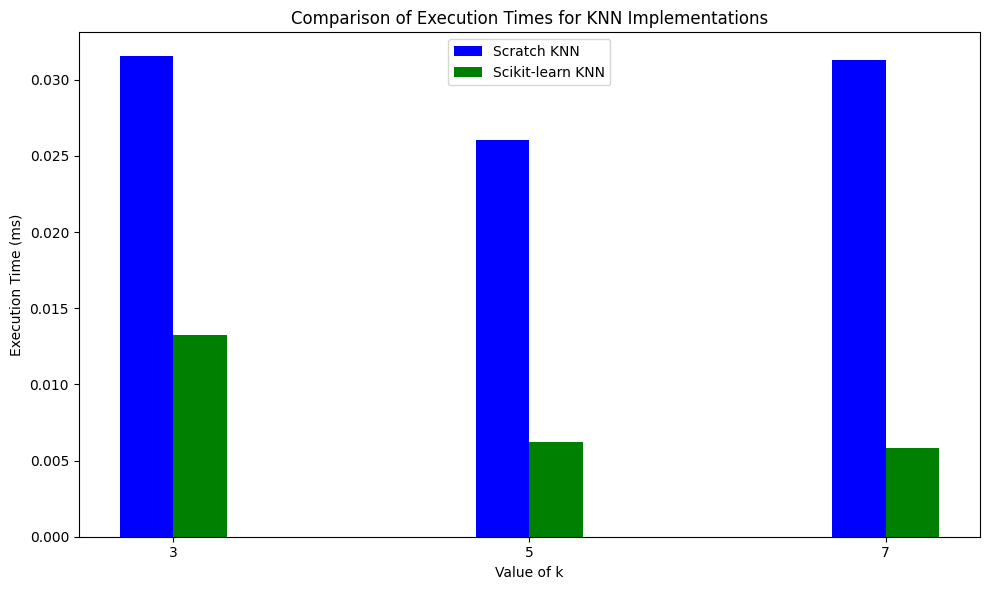

In [ ]:
import matplotlib.pyplot as plt

k_values = [3, 5, 7]
scratch_times = [time_3_sc, time_5_sc, time_7_sc]
sklearn_times = [time_3_sk, time_5_sk, time_7_sk]

plt.figure(figsize=(10, 6))
plt.bar([k - 0.15 for k in k_values], scratch_times, width=0.3, color='blue', label='Scratch KNN')
plt.bar([k + 0.15 for k in k_values], sklearn_times, width=0.3, color='green', label='Scikit-learn KNN')
plt.xlabel('Value of k')
plt.ylabel('Execution Time (ms)')
plt.title('Comparison of Execution Times for KNN Implementations')
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.show()


# Conclusion: Sklearn ones are faster